# In this notebook I conduct analysis of simulation results that applied generalized Lotka-Volterra (gLV) modeling in combination with a variant of a standard community assembly algorithm, namely the adaptive radiation scheme. This work is inspired on the paper: [Network spandrels reflect ecological assembly](https://onlinelibrary.wiley.com/doi/abs/10.1111/ele.12912)

**Jayson Gutierrez  
10/11/2020**

**Network spandrels reflect ecological assembly**  
**Abstract**  
Ecological networks that exhibit stable dynamics should theoretically persist longer than those that fluctuate wildly. Thus, network structures which are over-represented in natural systems are often hypothesised to be either a cause or consequence of ecological stability. Rarely considered, however, is that these network structures can also be by-products of the processes that determine how new species attempt to join the community. Using a simulation approach in tandem with key results from random matrix theory, we illustrate how historical assembly mechanisms alter the structure of ecological networks. We demonstrate that different community assembly scenarios can lead to the emergence of structures that are often interpreted as evidence of ‘selection for stability’. However, by controlling for the underlying selection pressures, we show that these assembly artefacts—or spandrels—are completely unrelated to stability or selection, and are instead by-products of how new species are introduced into the system. We propose that these network-assembly spandrels are critically overlooked aspects of network theory and stability analysis, and we illustrate how a failure to adequately account for historical assembly can lead to incorrect inference about the causes and consequences of ecological stability. 

### Our aim

The goal here is to investigate the dynamics of community assembly of purely competitive/antagonistic species interaction networks, as well as predominantly competitive networks carrying a small fraction of mutualistic/synergistic interacting species. To do this, we apply gLV modeling in combination with a variant of the adaptive radiation scheme (see details below) to simulate successive species invasion events starting from a minimal network composed of only a handful of competing species coexisting at equilibrium densities. Importantly, we simulate community assembly dynamics via assymetrical changes in the strengths of competition/mutualism  (i.e. $a_{i,j} \neq a_{j,i}$). This relaxation makes our simulations more general compared to the original study ([Network spandrels reflect ecological assembly](https://onlinelibrary.wiley.com/doi/abs/10.1111/ele.12912)).  

**Questions:**
- To what extent the size of the community reaches a saturation point beyond which any invasion event tend to systematically drive extinction of single or multiple species in the resident community, thereby preventing the community from increasing further in size?.  

- What is the impact that a small fraction of positive interactions in a predominantly competitive interaction network might have in terms of community assembly dynamics through adaptive radiation. Does a small fraction of positive interactions facilitate the ability of new species to invade a resident community?. A couple of interesting studies that have shed some light on this are: [Positive interactions among competitors can produce species‐rich communities](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1461-0248.2008.01204.x); [Diversity in a complex ecological network with two interaction types](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1600-0706.2008.16751.x).

- Finally, we will conduct a detailed analysis of feasibility (structural stability) and resilience to abiotic perturbations (e.g. biodiversity loss under climate-driven perturbations, using e.g. a single universal resilience function as introduced in [Universal resilience patterns in complex networks](https://www.nature.com/articles/nature16948)) for the assembled communities gathered across the multiple independent simulation replicates. 

To tackle these questions, we will run multiple independent instances of the community assembly algorithm. We plan to collect at least 500 replicates (per treatment: purely competitive vs predominantly competitive + mutualistic interactions), to study in detail the species invasion process. Moreover, we will examine whether any statistically significant relationship exist between the average competitive strength and the total biomass of the community (see below for details) against the invasibility of new species. 


### Materials & Methods

The gLV modeling approach is defined as follows:

$$\frac{dX_{i}}{dt} = X_{i}(r_{i} - s_{i}X_{i} + \sum_{j=1,j \neq i}^{S} a_{ij}X_{j})$$

With $X_i$ denoting the density of species $i$, $r_i$ giving the intrinsic species growth rate, $s_i$ indicating the effect of a species upon itself (e.g. intraspecific competition), and $a_{ij}$ denoting the effect of species $j$ on species $i$ (for $j \neq i$). 

The community assembly algorithm (customized adaptive radiation scheme) involves the following main steps: 
- Initialize a community assembly simulation experiment with a randomly generated community composed of 5 distinct species, which form a fully connected competitive network. Importantly, pairwise interactions ($A_{ij},A_{j,i}$) are initially symmetrical, but during the assembly process they tend to diverge.

- At each iteration of the algorithm, we randomly pick from the resident community a species and perturb its associated intereactions and assess whether such divergent species is able to invade the current community, by evaluating the following invasion criterion: $r_i + \sum_{j\neq i} a_{ij}X_{j} \geq 0$.  

- If the invassion criterion is met, then add the species to the community and simulate using the gLV model the long-term dynamics (see below) until the community reaches a stable configuration.  

- Check if any species was driven to extinction and remove from community.

- Repeat previous algorithmic steps sequentially over a given number of steps.

More specifically, at each iteration of the community assembly algorithm implemented, the introduction of the new species can disrupt the current ecological equilibrium; the invader may succeed in joining the community without loss of diversity, or it may lead to an extinction cascade of one or more resident species. Each potential invader is assigned a set of interaction coefficients, $a_{ij}$, dictating how it interacts with the resident species in the community. We generate new interaction coefficients by first selecting a ‘parent’ from among the resident species in the community. We then perturb the parent’s interaction coefficients by multiplying each element $a_{ij}$ by a randomly drawn value from $N(\mu=1,\sigma)$, and we bound the perturbed values to within $[-1,0]$ if needed. Critically, here we adopted the product-rule mutation scheme that seems to be more biologically realistic than other schemes (see [Mutation Rules and the Evolution of Sparseness and Modularity in Biological Systems](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0070444)), which seems to favor the assembly of modular networks.   

During the algorithm, whenever an invasion criterion is satisfied we add the new species to the community alongside its parent species; if not, we select at random a new parent and once again perturb its interaction coefficients. We repeat this process, each time randomly selecting a new parent (with replacement) and perturbing its coefficients, until the invasion criterion is satisfied and the species can invade. Once a successful invader is found, we check if the equilibrium of the new community is stable and feasible (The feasibility criterion means that all species have positive abundances at equilibrium (i.e. $X_{i}^{*} > 0  \forall i$)). To achieve this, we simulate the dynamics of the system over 2000 time steps, a time window typically sufficient to allow the system attain equilibration. The presence of a steady state of species diversity is assessed using an augmented Dickey–Fuller test, a unit root test whose null hypothesis is that the species richness time series has a unit root (that is, it is non-stationary and has a time-dependent structure) and whose alternative hypothesis is that species richness does not have a unit root and is stationary over time. We assess the community density profiles for equilibrium by applying this test and rejecting the null hypothesis when the P value is below some threshold ρ = 0.05. The rejection of the null hypothesis indicates that the species richness has entered a steady state.  

Importantly, every invader is added to community at a low initial abundance (set at xi = 1e-5). Therefore, we assume that an invasion was successful if the invader was able to increase when rare [The mechanics of community assembly and
succession](https://www.sciencedirect.com/science/article/abs/pii/S0022519305800530). In addition, we checked that the invader's density at equilibrium was greater than the initial abundance. It should be noticed that stationary species densities recorded during every step of the algorithm are used as initial values for the next step that simulates an invasion event.  

We assemble a community progressively. At each step of the algorithm a newly created species is checked for its ability to invade, and this is always added to the community as long as the invader does not drive to extinction any of the resident species in the community. Whenever the invader drives extinction of a species in the resident community, this can be incorporated to the community at a certain probability given by the Metropolis criterion (accept if $rand() < exp^{(d/k)}$, with $d$ denoting the difference in community size between current and previous community, and $k$ an acceptance rate with smaller values being quite stringent, we set $k=0.25$), and thus the current community may ocassionaly shrink in size during the assembly process. At every step we recheck stability and feasibility of the updated species assemblage. For all subsequent results, the assembly process is repeated until a community reaches a given number of unique species. 

Note that the algorithm described above is obviously a simplification to the community assembly process, which is typically influenced by several factors operating over a vast range of temporal and spatial scales (see: [Ecological and Evolutionary Perspectives on Community Assembly](https://linkinghub.elsevier.com/retrieve/pii/S0169534715000488)). Our simplification is, nevertheless, motivated by previous studies concluding that biodiversity is a key design principle of resilient and reliable ecosystems (see: [Biodiversity enhances ecosystem reliability](https://www.nature.com/articles/37348); [Diversity and Stability of Ecological Communities: A Comment on the Role of Empiricism in Ecology](https://www.journals.uchicago.edu/doi/10.1086/283181)).

In order to ensure that emergent network patterns are a direct result of competitive dynamics (and not otherwise due to ancillary fitness differences among species) we assume, without loss of generality, that species have identical growth rates ($r_i = 1 \: \forall i$) and that intraspecific competitive effects are equivalent across species ($a_{ii} = -1 \: \forall i$). This implies that species differ only in the magnitude and distribution of their interspecific interaction coefficients. Critically, unlike the original study, we do not restrict our community assembly simulations to proceed via symmetrical changes in competition coeeficients (e.g. $a_{ij} = a_{ji}$), but allowed pairwise species interaction coefficients to change assymetrically. Notice however, that we start the simulations from randomly generated symmetrical interaction matrices. 

**NOTE:** For an interesting alternative community assembly algorithm check the paper: [The balance of interaction types determines the assembly and stability of ecological communities](https://www.nature.com/articles/s41559-020-1121-x#:~:text=We%20demonstrate%20that%20the%20balance,tend%20to%20provide%20unique%20benefits.). Another intriguing modeling paper, which takes into account resource competition is: [Diversity, Stability, and Reproducibility in Stochastically Assembled Microbial Ecosystems](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.120.158102).

During the community assembly process we collect the following statistics at every step simulated: 

- Community size ($S$).

- Total steadt state biomass of the community: $T = \sum_{i=1}^{S}X_i$

- Ecological variability: $V = \frac{1}{S} \sum_{i=1}^{S}Var_t(X_i(t))$

- Mean interspecific competition strength: $MCS = \frac{\sum_{i=j}^{S}a_{ij}}{S(S-1)}$

- SKN: Assess skewness of competitive interaction distributions in the network

- DE2U: Difference in entropy compared to a uniform distribution: A large deviation from the uniform distribution indicates that one or more interactions dominate the network  

- NEST: Assess nestedness, the spectral radius (the absolute value of the largest real part of the eigenvalues of the adjacency matrix) of any unipartite network whose interactions are positive or null. Here the spectral radius is divided by the square root of (2L(S-1))/S as proposed in [The structure of ecological state transitions: Amplification, synchronization, and constraints in responses to environmental change](https://www.sciencedirect.com/science/article/abs/pii/S1476945X11000614)  

- HET: heterogeneity for an unipartite network, a topological characteristic which quantifies the difference in in- and out-going degrees between species. It is computed as σ_in * σ_out / s_mean. A value of 0 indicates that all species have the same (weighted) in- and outdegrees.  

**NOTE:** For a comprehensive review on a large variety of ecologically sound network metrics see: [Analysing ecological networks of species interactions](https://onlinelibrary.wiley.com/doi/10.1111/brv.12433).

<img src="../figures/AdaptiveRadiationScheme.png">

Figure 1. Schematics on the community assembly algorithm. For the purely competitive networks we use the adaptive radiation scheme, in which a parent species is first selected from among the current species in the community, and the parent’s interaction coefficients are perturbed slightly. If the species can invade it is added to the community; if not, the coefficients are discarded and a new parent is selected.

### Simulating the impact that a moderate level of mutualism has on a network that is initially prevalently competitive
NOTE: here the network can become increasingly more mutualistic as new species are added to the community through the assembly process.

The community assembly algorithm (customized adaptive radiation scheme) involves the following main steps:

- Initialize a community assembly simulation experiment with a randomly generated community composed of 5 distinct species, which form a fully connected competitive network. Importantly, pairwise interactions ($A_{ij},A_{ji}$) are initially symmetrical, but during the assembly process they tend to diverge. Unlike the previous algorithm for assembling purely competitive networks, here we initialize a network with 80% (8) of the pairwise interactions to be competitive and the remaining 20% (2) to be mutualistic (total number of pairwise interactions is $N(N-1)/2$).  

- The rest of the algorithm is essentially the same as described above for the purely competitive networks.

### Future research directions  
The software package developed here can be readily extended in many directions for future studies that may aim to:  
- Go beyond purely/predominantly competitive networks, and incorporate exploitative (+/-,-/+) species interactions to make the network modeling more general.

- Assess the complexity–feasibility relationship using methods from: [Feasibility and coexistence of large ecological communities](https://www.nature.com/articles/ncomms14389). In particular, check for feasibility when altering the intrinsic growth rates.

- Simulate network dynamics using non-linear feedback (type II functional responses, or saturable gLV model), as proposed in the paper: [The balance of interaction types determines the assembly and stability of ecological communities](https://www.nature.com/articles/s41559-020-1121-x#:~:text=We%20demonstrate%20that%20the%20balance,tend%20to%20provide%20unique%20benefits.). For instance, a saturable version of the gLV model described above, which exhibits a much higher degree of non-linearity, can be formulated as follows:

$$\frac{dX_{i}}{dt} = X_{i}(r_{i} - s_{i}X_{i} + \sum_{j=1,j \neq i}^{S} a_{ij}\frac{X_{j}^n}{K_{ij}^n + X_{j}^n})$$

This model introduces an additional interaction parameter, $K_{ij}$, which denotes the density of species $X_j$ at which half maximal fitness effect on species $X_i$ is achieved, and $n$ gives the Hill coefficient, which can be set to approximate a Holling type-II ($n=1$) or type III ($n=2$) functional response (see: [A Derivation of Holling’s Type I, II and III Functional Responses in Predator–prey Systems.](https://www.sciencedirect.com/science/article/abs/pii/S002251931300091X)).

- FInally, perhaps the most comprehensive species interaction dynamic network modeling approach is the bioenergetic consumer-resource model described in: [Complex food webs prevent competitive exclusion among producer species](https://royalsocietypublishing.org/doi/10.1098/rspb.2008.0718), and [Body-size and consumer-resource dynamics](https://www.jstor.org/stable/2462335?seq=1#metadata_info_tab_contents).

Loading software package

In [1241]:
using MultivariateStats, Clustering
include("community_assembly_v0.jl")
# using DifferentialEquations, DiffEqBiological, ModelingToolkit, Latexify
# using Random, LinearAlgebra, Distributions, StatsBase, Statistics, HypothesisTests
# using HDF5, JLD, DelimitedFiles, DataFrames, CSV, CPUTime, Queryverse
# using LightGraphs, GraphPlot, SparseArrays, Plots
#using EcologicalNetworks, EcologicalNetworksPlots

runAdaptRadiationCommunAssembly2 (generic function with 1 method)

In [1242]:
# function vis_sps_interact_net(cnm; int_str_thr=0.85,layout=:circular)
#     "Use function to visualize ecological networks using various types of layouts"
#     #Set self-loops to 0, to avoid these being displayed
#     cnm[diagind(cnm)] .= 0;

#     #Let's apply a threshold to the distribution of interaction strengths in the network.
#     #We assume that only the entries in the matrix α{ij} >= Q3 are the main drivers of community dynamics
#     unique_coeffs = (sort(unique(cnm)));
#     cutoff = quantile(abs.(unique_coeffs),int_str_thr)
#     thresholdedA = (abs.(cnm) .>= cutoff);
#     new_cnm = sign.(cnm).*thresholdedA;

#     #Create graph object out of the adjacency matrix
#     g = LightGraphs.DiGraph(new_cnm)
#     #Let's change edge color appropriately: create an empty array to store edge color
#     edge_colors_mat = Array{Symbol,2}(undef,size(new_cnm)...);
#     for e in LightGraphs.edges(g)
#         if(new_cnm[e.src,e.dst]<0)
#             edge_colors_mat[e.src,e.dst]=:red
#         else
#             edge_colors_mat[e.src,e.dst]=:blue
#         end
#     end

#     #Plot graph; choose among the following layouts: method=:circular or method=:arcdiagram or method=:chorddiagram
#     p=GraphRecipes.graphplot(g, 
#                              nodeshape=:hexagon,
#                              names=["Sps$i" for i in 1:size(new_cnm,1)],
#                              nodesize=0.075,
#                              nodecolor = range(colorant"green", stop=colorant"yellow", length=size(new_cnm,1)),
#                              curvature_scalar=0.05, 
#                              shorten=0.04, 
#                              arrow=arrow(:closed, :tail, 0.01, 0.01),
#                              edgecolor=edge_colors_mat,
#                              method=layout
#                              )
#     plot(p,size=(900,900))
    
# end

#### Testing the library: creating a random network of a given size that meets the feasibility criterion

In [5]:
CS = 7
rnd_param_struct,sol = rndGenerationInitSpsNetwork(CS, sample_range_A = (-1.,1e-2),
                                                   sample_range_grs = (1e-1,1e0),
                                                   sample_range_ics = (1e-1,1e0),
                                                   edge_connect_probab = rand(Uniform(0.95,1.0)),
                                                   integ_steps = 2000, ub_density = 1e1, 
                                                   lb_density = 1e-3, tw=1:500, 
                                                   deterministic=:constant, lag=0, α=0.05,
                                                   A_symmetric = true);

#### Now let's add a new species to the resident community (when in steady state), which can successfully invade!  
Here we consider several criteria (feasibility, stationarity and invasion score as discussed previously) to select the invading species. As a post-processing step, the newly assembled community is pruned for any species driven to extinction by the invader!  

Let's visualize community dynamics and the invader's abundance trajectory, which is shown in red. Notice that the invader is required to get established in the community when initially rare, that is starting from a very low abundance ($X_i(t_0) = 10^{-5}$)

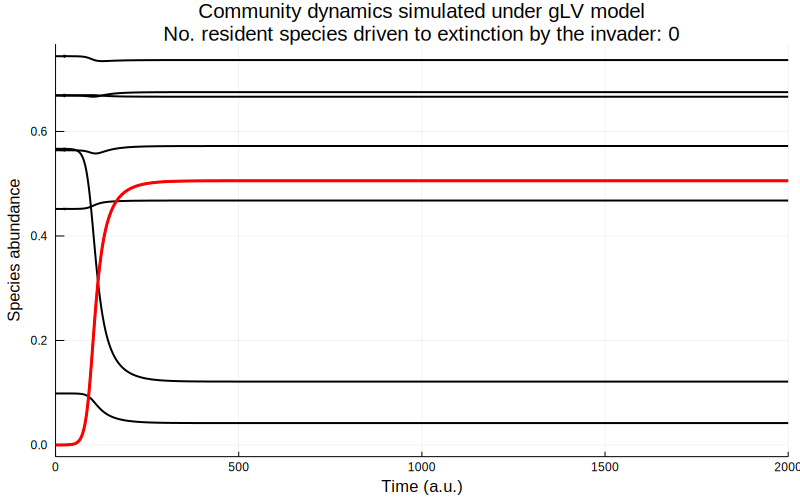

In [6]:
augmented_param_struct, sol_invaded_community, ss_abundances = addNewSps2ResidentCommunity(rnd_param_struct,
                                                                                           set_intrasps_effects=-1,
                                                                                           perturb_intrinsic_grs=false);
abund_min_thr=1e-6;
ext_sps = length(findall(ss_abundances .< abund_min_thr));
lbl = "Community dynamics simulated under gLV model \nNo. resident species driven to extinction by the invader: $ext_sps";

plot(sol_invaded_community,color=:black,leg=false,lw=2)
invader_id = length(augmented_param_struct["initConds"])
plot!(sol_invaded_community,vars=invader_id,color=:red,leg=false,lw=3,
      ylabel="\n Species abundance",xlabel="Time (a.u.)", size=(800,500),
      title=lbl)

The previous simulation test illustrates a case where an invasion event (red color coded trajectory) drives extinction of a species in a resident community

#### Uncomment code block below to run the community assembly algorithm for a given number of invasion steps. The assumption is that a species within the reference community diversifies and splits into two closely related species, one of which becomes the invader.

In [298]:
# init_size,target_size = (5, 50)
# sample_range_A = (-1.,-1e-2)
# edge_connect_probab = 1.0 #rand(Uniform(0.5,1))
# set_intrasps_effects=-1
# prob_scale=0.25
# perturb_intrinsic_grs=false
# iter_limit=500
# A_symmetric = true
# repl = 0
# dt = @elapsed begin
#     CPUdt = @CPUelapsed runAdaptRadiationCommunAssembly(init_size,target_size, 
#                                                         sample_range_A = sample_range_A,
#                                                         edge_connect_probab = edge_connect_probab,
#                                                         prob_scale=prob_scale,
#                                                         set_intrasps_effects=set_intrasps_effects,
#                                                         perturb_intrinsic_grs=perturb_intrinsic_grs,
#                                                         iter_limit=iter_limit, A_symmetric=A_symmetric,
#                                                         repl=repl);
# end

# Preliminary Simulation Results 

#### Let's check preliminary simulation results (20 independent replicates simulated over 48h): assembly of purely competitive networks.  

In [503]:
for iter in 1:20
    fid = "../output/compet_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$iter.jld"
    assembled_net_params = load(fid)["data"];
    ns = length(assembled_net_params["growthRates"]);
    println("Run  $iter assembled a network of size: $ns species")
end

Run  1 assembled a network of size: 40 species
Run  2 assembled a network of size: 42 species
Run  3 assembled a network of size: 41 species
Run  4 assembled a network of size: 38 species
Run  5 assembled a network of size: 40 species
Run  6 assembled a network of size: 36 species
Run  7 assembled a network of size: 37 species
Run  8 assembled a network of size: 36 species
Run  9 assembled a network of size: 37 species
Run  10 assembled a network of size: 37 species
Run  11 assembled a network of size: 41 species
Run  12 assembled a network of size: 36 species
Run  13 assembled a network of size: 42 species
Run  14 assembled a network of size: 40 species
Run  15 assembled a network of size: 37 species
Run  16 assembled a network of size: 40 species
Run  17 assembled a network of size: 38 species
Run  18 assembled a network of size: 38 species
Run  19 assembled a network of size: 38 species
Run  20 assembled a network of size: 40 species


Firstly, let's have a look at the dynamics of a community assembled by simulating several hundreds of invasion events.

In [859]:
repid = 14
fid = "../output/compet_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$repid.jld"
assembled_net_params = load(fid)["data"];
num_sps = length(assembled_net_params["growthRates"]);

Visualizing the whole set of trajectories to double check for stability!  

Clearly, the network shows an asymptotic behavior!

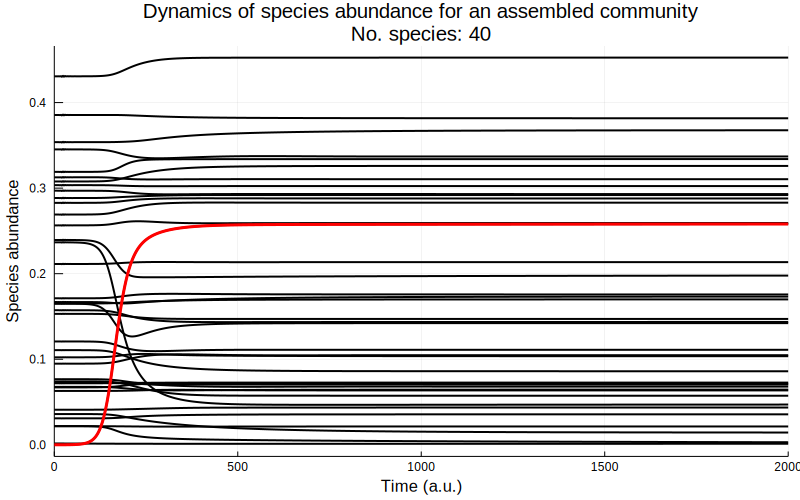

In [860]:
sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
plot(sol_invaded_community,color=:black,leg=false,lw=2)
invader_id = length(assembled_net_params["initConds"])
plot!(sol_invaded_community,vars=invader_id,color=:red,leg=false,lw=3,
      ylabel="\n Species abundance",xlabel="Time (a.u.)", size=(800,500),
      title="Dynamics of species abundance for an assembled community\nNo. species: $num_sps")

The distribution of steady state abundances shows that 15 of the species in the community 
coexist at a relatively low abundance (abundance <= 0.1, rare biosphere?)



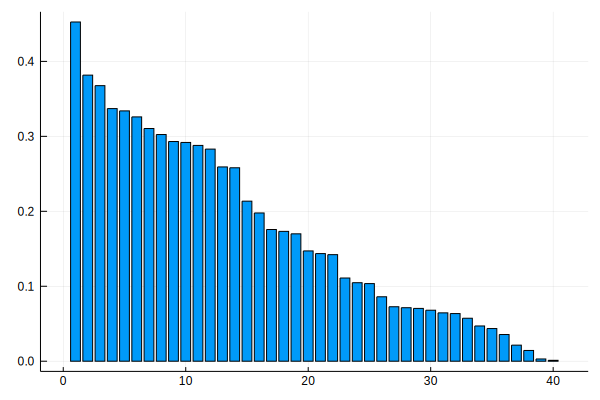

In [861]:
dist_ss_densities = sol_invaded_community(assembled_net_params["endTimePoint"]);
abund_thr = 0.1
low_abund_sps = length(findall(dist_ss_densities .< abund_thr))
println("The distribution of steady state abundances shows that $low_abund_sps of the species in the community \ncoexist at a relatively low abundance (abundance <= $abund_thr, rare biosphere?)\n")
bar(reverse(sort(dist_ss_densities)), leg=false)

#### Let's check how sensitive the assembled ecological network shown above is to very slight perturbations to intrinsic the growth rates

Number of iterations to find a legal solution: 1



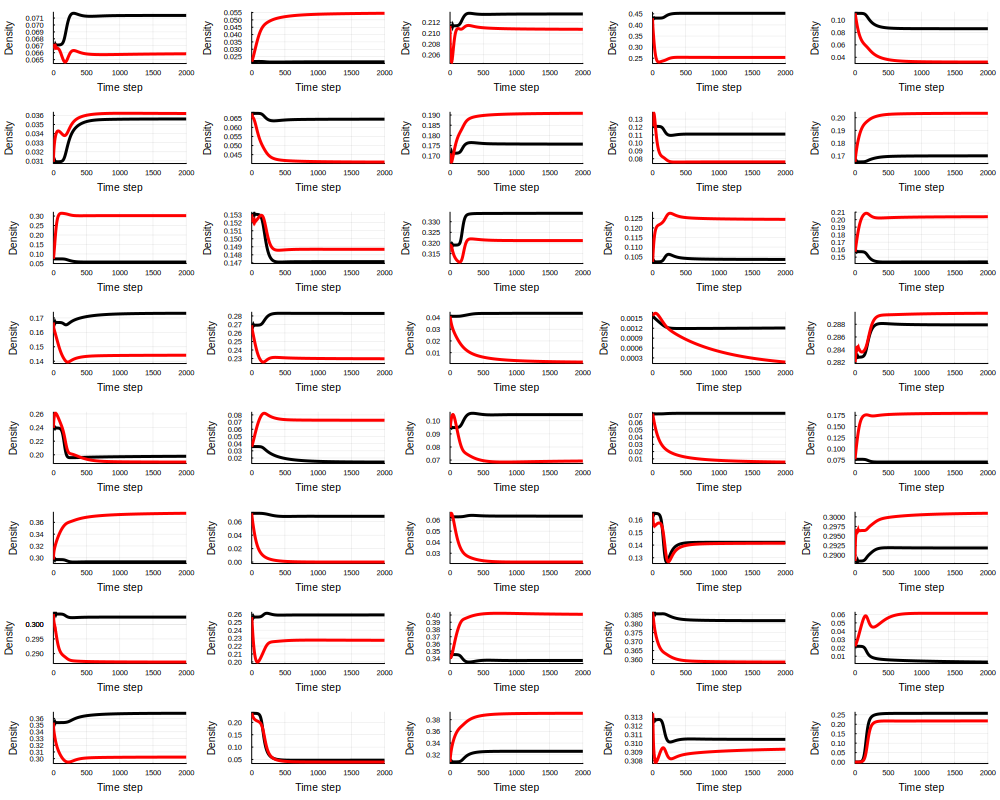

In [517]:
begin
    
    let sol_pert_invaded_community;

        sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);

        ###Perturbing growth rates
        mutat_assembled_net_params = deepcopy(assembled_net_params);
        grs = mutat_assembled_net_params["growthRates"]
        #Applying a product rule perturbation
        #Perturbation factors drawn from a normal distribution
        μ_mutat,σ_mutat = (1, 0.01)
        cond = true
        n=0
        pert_vect_func()  = rand(Normal(μ_mutat,σ_mutat),length(grs));
        while(cond)
            #pert_vect  = rand(Normal(μ_mutat,σ_mutat),length(grs))
            mutat_assembled_net_params["growthRates"] = grs.*pert_vect_func();

            sol_pert_invaded_community = checkSol4DynSyst(mutat_assembled_net_params,1e1);
            cond = sol_pert_invaded_community.retcode!=:Success;
            n+=1
        end
        println("Number of iterations to find a legal solution: $n\n")
        plot(sol_invaded_community,color=:black,leg=false,lw=3,size=(1000,900),layout=(8,5))
        plot!(sol_pert_invaded_community,color=:red,leg=false,lw=3, size=(1000,800), layout=(8,5),tickfont = (5, :black))
        xlabel!("Time step",xguidefontsize=7)
        ylabel!("Density",yguidefontsize=7)
        xlims!((0,2005))
    end
    
end

#### Observation  
The test above shows that slight perturbations to the intrinsic growth rates, using a product-rule perturbation with perturbation magnitude drawn from Normal(μ=1,σ=0.01), can have a huge impact on system's dynamics and on the long term behavior of the system. It is noticiable that the profiles before and after perturbation tend to diverge drastically, and tend to attain rather different end-time point (stationary) densities.

### Let's simulate the above assembled network over 1000 times by slightly perturbing the intrinsic growth rates of each species in the network. Applying product-rule perturbation ...

In [ ]:
begin

    #Applying a product rule perturbation
    #Perturbation factors drawn from a normal distribution
    μ_mutat,σ_mutat = (1, 0.01)  
    
    num_sols = 1000

    repid = 14
    fid = "../output/compet_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$repid.jld"
    assembled_net_params = load(fid)["data"];
    num_sps = length(assembled_net_params["growthRates"]);
    tw=1:assembled_net_params["endTimePoint"];
    deterministic=:constant;
    lag=0;
    α=0.05;

    etp_sol0 = Array{Float64,2}(UndefInitializer(),num_sols,num_sps);
    stationarity = Any[];
    #Get original steady state densities and add to container
    sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
    
    n=1;
    cond = true
    pert_vect_func()  = rand(Normal(μ_mutat,σ_mutat),length(grs));
    while(cond)   
        #Randomly pick initial conditions
        ###Perturbing growth rates
        mutat_assembled_net_params = deepcopy(assembled_net_params);
        grs = mutat_assembled_net_params["growthRates"]
        #pert_vect  = rand(Normal(μ_mutat,σ_mutat),length(grs))
        mutat_assembled_net_params["growthRates"] = grs.*pert_vect_func();
        sol_pert_invaded_community = checkSol4DynSyst(mutat_assembled_net_params,1e1);
        if(sol_pert_invaded_community.retcode==:Success)
           etp_sol0[n,:] = sol_pert_invaded_community(mutat_assembled_net_params["endTimePoint"]);
           #Check for stationarity using the ADF test
           ss_criterion = testTimeSeries4Stationarity(sol_pert_invaded_community; tw=tw, 
                                                      deterministic=deterministic, lag=lag, α=α);
            push!(stationarity,(ss_criterion*1))
            n+=1
           if(n==(num_sols+1))
                break;
            end
        end    
    end
    
end

Let's run PCA and discriminate between stationary and non-stationary solutions. Results shown in plot below!

In [775]:
# train a PCA model, allowing up to 2 dimensions
M0 = fit(PCA, etp_sol0'; maxoutdim=2)
# apply PCA model to testing set
Yte0 = transform(M0, etp_sol0');

#Grab points found to reach steady state
Yte_ss = Yte0[:,stationarity.==1];
#Grab points found to be non-stationary
Yte_nonss = Yte0[:,stationarity.==0];

### Let's simulate the above assembled network over 1000 times with randomly chosen initial conditions to check for the stability of the system, and also to inspect using a PCA for the existence of a stable attractor

In [793]:
begin
    
    num_sols = 1000

    repid = 14
    fid = "../output/compet_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$repid.jld"
    assembled_net_params = load(fid)["data"];
    num_sps = length(assembled_net_params["growthRates"])

    ics = Array{Float64,2}(UndefInitializer(), (num_sols+1),num_sps);
    etp_sol = Array{Float64,2}(UndefInitializer(), (num_sols+1),num_sps);
    
    ics[1,:] = assembled_net_params["initConds"]
    #Get original steady state densities and add to container
    sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
    etp_sol[1,:] = sol_invaded_community(assembled_net_params["endTimePoint"]);  
    
    n=1;
    cond = true
    while(cond)   
        #Randomly pick initial conditions
        rnd_ics = rand(num_sps)
        assembled_net_params["initConds"] = rnd_ics;
        sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
        if(sol_invaded_community.retcode==:Success)
           n+=1
           ics[n,:] = rnd_ics
           etp_sol[n,:] = sol_invaded_community(assembled_net_params["endTimePoint"]);
           if(n==(num_sols+1))
                break;
            end
        end    
    end
    
end

Visualizing, based on PCA, reference point with respect to perturbed conditions: overlying on solutions perturbed via ICs those perturbed via intrinsic growth rates

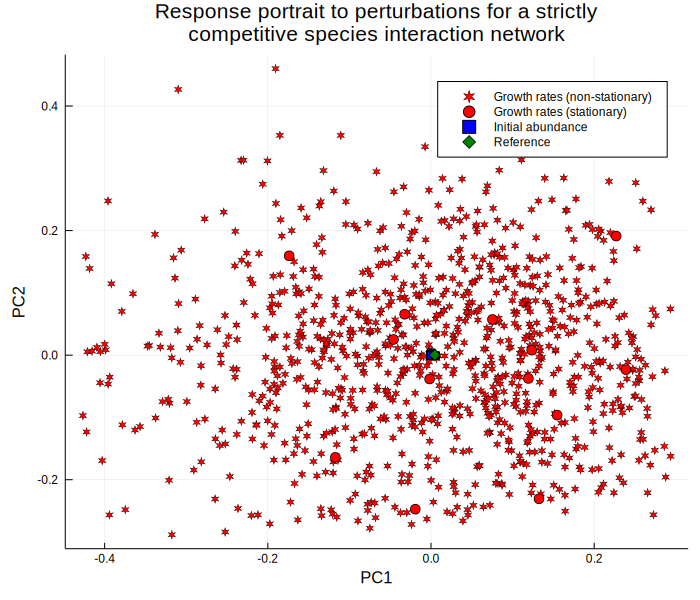

In [805]:
# train a PCA model, allowing up to 2 dimensions
M = fit(PCA, etp_sol'; maxoutdim=2)
# apply PCA model to testing set
Yte = transform(M, etp_sol');

scatter(Yte_nonss[1,1:end],Yte_nonss[2,1:end],
        marker=:star6,
        markersize=4,
        linewidth=0,label="Growth rates (non-stationary)",
        color=:red,
        size=(700,600))

scatter!(Yte_ss[1,1:end],Yte_ss[2,1:end],
        marker=:circle,
        markersize=5,
        linewidth=0,label="Growth rates (stationary)",
        color=:red,
        size=(700,600))

scatter!(Yte[1,2:end],Yte[2,2:end],
         marker=:rect,
         markersize=3,
         color=:blue,
         linewidth=0,
         label="Initial abundance")

scatter!([Yte[1,1]],[Yte[2,1]],
         marker=:diamond,
         markersize=5,
         color=:green,
         linewidth=0,
         label="Reference")

plot!(xlabel="PC1",ylabel="PC2", size=(700,600))
title!("Response portrait to perturbations for a strictly\ncompetitive species interaction network")

#### Observation  
The above results show the contrasting responses of an ecological networks with competitively interacting species in the face of perturbations taking different forms: 1) alterations of initial abundances (system exhibits attractor state); and 2) slight alterations to the intrinsic growth rates (system exhibits a wide variety of responses, going from robustness to drastic shifts in system dynamics).

### Next, let's check the behavior of the community assembly process at different levels

In [506]:
stats_commun_assembly = CSV.read("../output/compet_commun_assembly/StatsCCAssemblyStandGralLV_Rep10.csv");
names(stats_commun_assembly)

9-element Array{Symbol,1}:
 :commun_size
 :ecol_stabil
 :total_biom
 :mean_intsps_comp_str
 :skn_int_dist
 :entropy_diff
 :nestedness
 :heter_in_out_degrees
 :thr_connect

When examining the dynamics of the community assembly process at the level of the number of species one can see that for 500 successive invasion events the community size is still growing. To properly test the saturation/staganation of the system we will have to simulate > 10000 invasion events. 

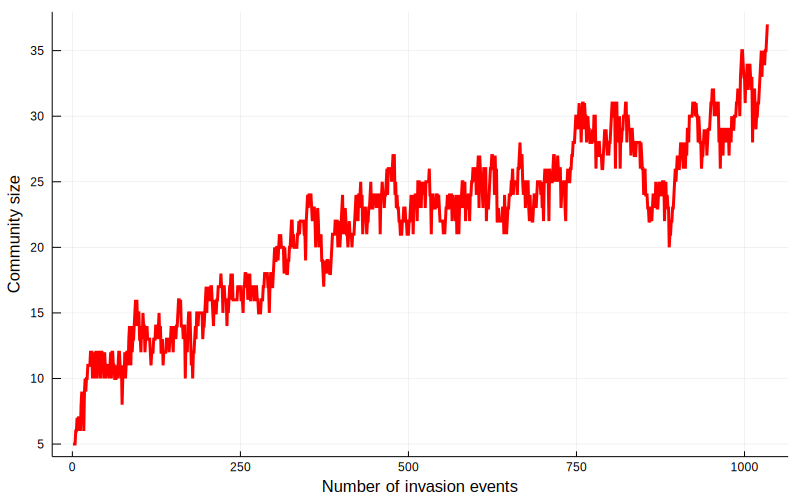

In [507]:
plot(stats_commun_assembly[!,:commun_size],color=:red,leg=false,lw=3,
     ylabel="\n Community size",
     xlabel="Number of invasion events", size=(800,500))

Regarding the total biomass, it is clear that this is still in its early stages ...

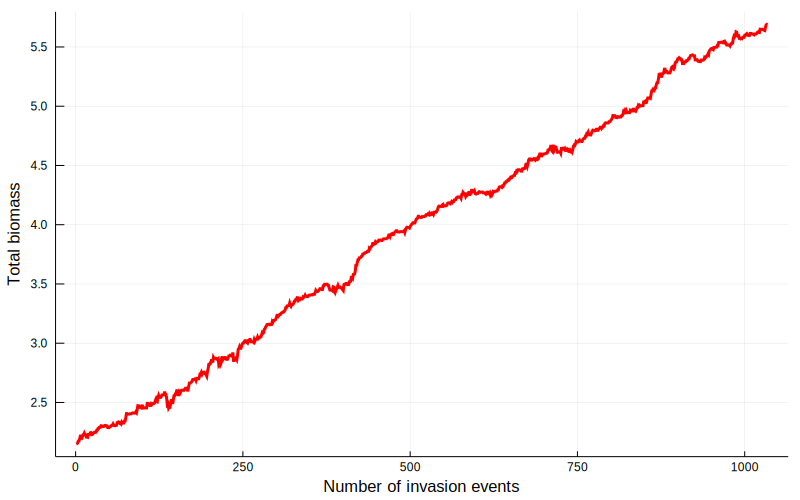

In [508]:
plot(stats_commun_assembly[!,:total_biom],color=:red,leg=false,lw=3,
     ylabel="\n Total biomass",
     xlabel="Number of invasion events", size=(800,500))

As for the topological descriptor considered so far (MCS), it is also clear that this is still growing ...

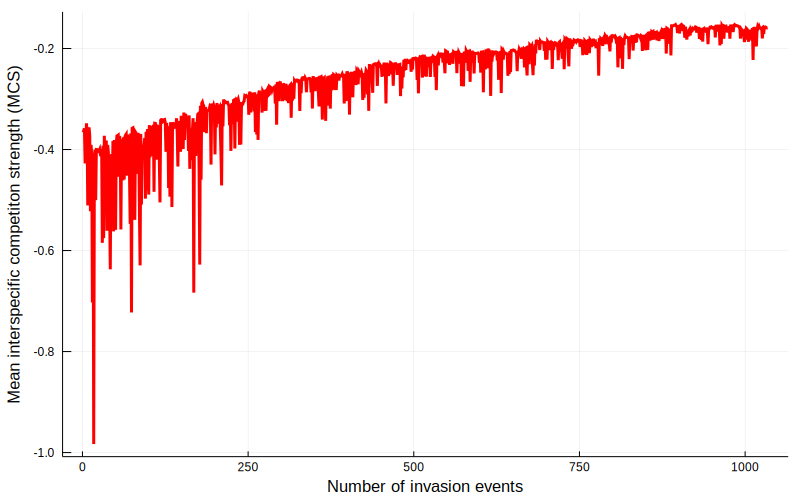

In [509]:
plot(stats_commun_assembly[!,:mean_intsps_comp_str],color=:red,leg=false,lw=3,
     ylabel="\n Mean interspecific competiton strength (MCS)",
     xlabel="Number of invasion events", size=(800,500))

Let's run an instance of the adaptive radiation scheme for community assembly of competitive interactions

In [510]:
# init_size,target_size = (5, 50)
# sample_range_A = (-1.,-1e-2)
# edge_connect_probab = 1.0 #rand(Uniform(0.5,1))
# set_intrasps_effects=-1
# prob_scale=0.25
# perturb_intrinsic_grs=false
# iter_limit=2000
# A_symmetric = true
# dyn_var_thr = 1e-4
# repl = 20
# dt = @elapsed begin
#     CPUdt = @CPUelapsed runAdaptRadiationCommunAssembly(init_size,target_size, 
#                                                         sample_range_A = sample_range_A,
#                                                         edge_connect_probab = edge_connect_probab,
#                                                         prob_scale=prob_scale,
#                                                         set_intrasps_effects=set_intrasps_effects,
#                                                         perturb_intrinsic_grs=perturb_intrinsic_grs,
#                                                         iter_limit=iter_limit, A_symmetric=A_symmetric,
#                                                         dyn_var_thr=dyn_var_thr,repl=repl);
# end

#### Now let's check a fully assembled community that was initially prevalently competitive, with a slight amount of mutualistic pairwise interactions

In [879]:
for iter in 1:10
    fid = "../output/compet_mutual_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$iter.jld"
    assembled_net_params = load(fid)["data"];
    ns = length(assembled_net_params["growthRates"]);
    println("Run  $iter assembled a network of size: $ns species")
end

Run  1 assembled a network of size: 30 species
Run  2 assembled a network of size: 36 species
Run  3 assembled a network of size: 40 species
Run  4 assembled a network of size: 42 species
Run  5 assembled a network of size: 33 species
Run  6 assembled a network of size: 26 species
Run  7 assembled a network of size: 40 species
Run  8 assembled a network of size: 40 species
Run  9 assembled a network of size: 39 species
Run  10 assembled a network of size: 39 species


In [880]:
repid = 7
fid = "../output/compet_mutual_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$repid.jld"
assembled_net_params = load(fid)["data"];
num_sps = length(assembled_net_params["growthRates"]);

#### Visualizing the whole set of trajectories to double check for stability!  

Clearly, the network shows an asymptotic behavior!

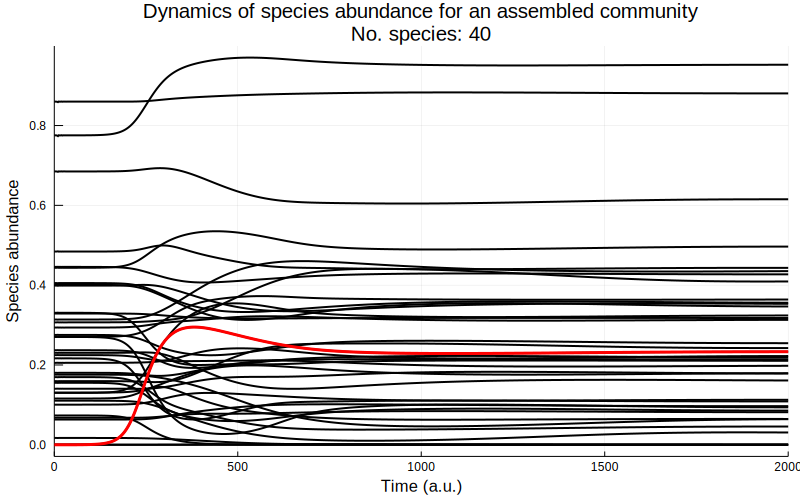

In [865]:
sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
P1 = plot(sol_invaded_community,color=:black,leg=false,lw=2)
invader_id = length(assembled_net_params["initConds"])
P2 = plot!(sol_invaded_community,vars=invader_id,color=:red,leg=false,lw=3,
      ylabel="\n Species abundance",xlabel="Time (a.u.)", size=(800,500),
      title="Dynamics of species abundance for an assembled community\nNo. species: $num_sps")

The distribution of steady state abundances shows that 12 of the species in the community 
coexist at a relatively low abundance (abundance <= 0.1, rare biosphere?)



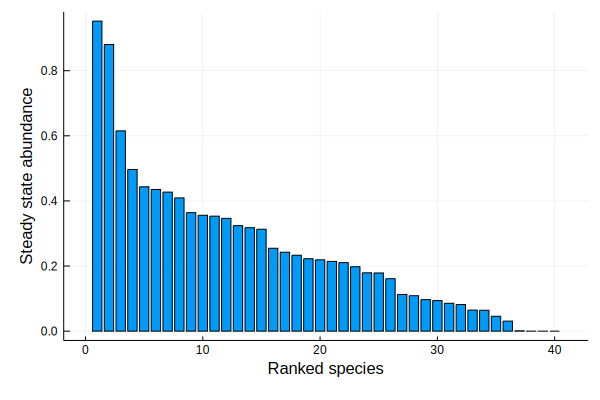

In [1233]:
dist_ss_densities = sol_invaded_community(assembled_net_params["endTimePoint"]);
abund_thr = 0.1
low_abund_sps = length(findall(dist_ss_densities .< abund_thr))
println("The distribution of steady state abundances shows that $low_abund_sps of the species in the community \ncoexist at a relatively low abundance (abundance <= $abund_thr, rare biosphere?)\n")
bar(reverse(sort(dist_ss_densities)), leg=false)
ylabel!("Steady state abundance")
xlabel!("Ranked species")

#### Let's visualize the topology/wiring of the assembled species interaction network

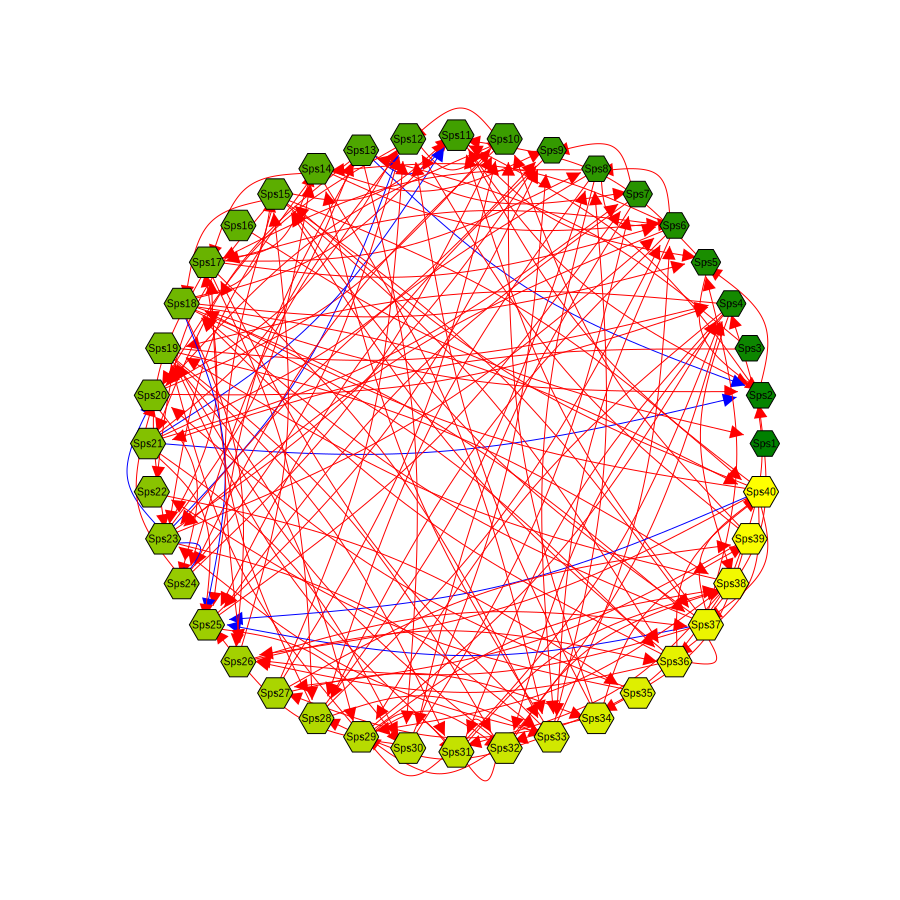

In [1239]:
cnm = assembled_net_params["connectMatrix"];

vis_sps_interact_net(cnm,int_str_thr=0.9,layout=:circular)

In [1169]:
###Alternative way of visualizing the network with GraphPlot.gplot
# g = LightGraphs.DiGraph(new_cnm)
# #Let's change edge color appropriately
# edge_colors = []
# for e in LightGraphs.edges(g)
    
#     if(new_cnm[e.src,e.dst]<0)
#         push!(edge_colors,colorant"red")
#     else
#         push!(edge_colors,colorant"blue")
#     end
# end
# #layout=(args...)->spring_layout(args...; C=20)
# GraphPlot.gplot(g, layout=circular_layout,edgelinewidth=1.5,edgestrokec=[colorant"blue"])
# # draw(PNG("graph_test.png", 16cm, 16cm), GraphPlot.gplot(g, layout=circular_layout, edgelinewidth=1.5, edgestrokec=colors))

#### Let's check how sensitive the assembled ecological network shown above is to very slight perturbations to intrinsic the growth rates

Number of iterations to find a legal solution: 2



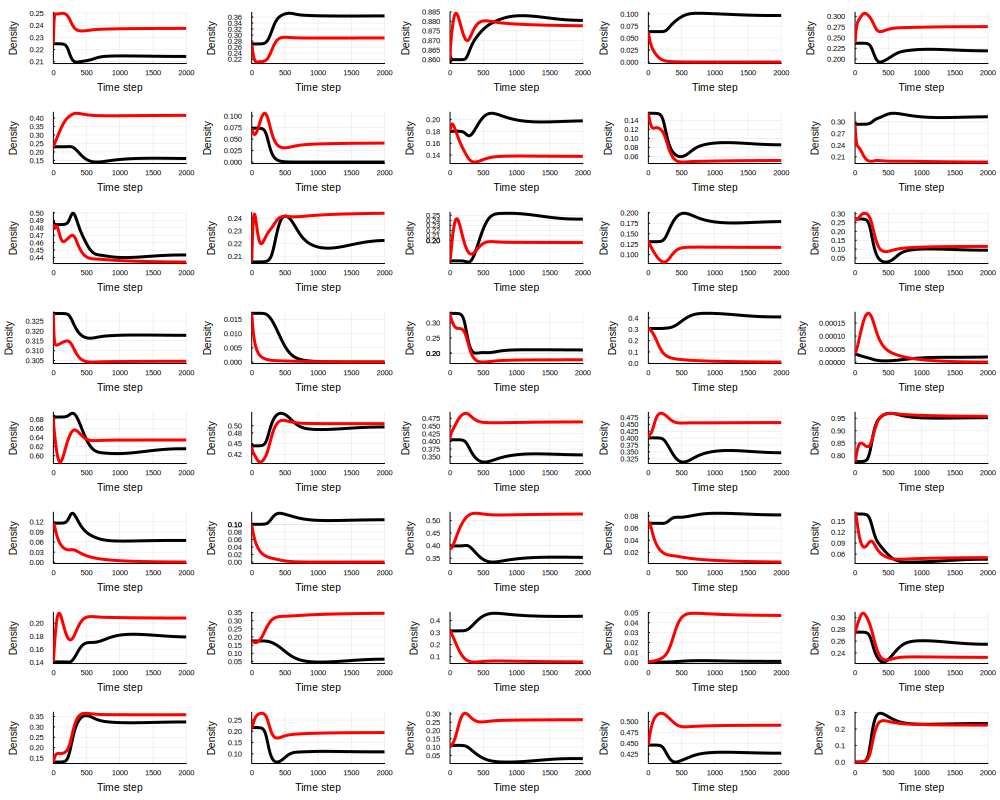

In [586]:
begin
    
    let sol_pert_invaded_community;

        sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);

        ###Perturbing growth rates
        mutat_assembled_net_params = deepcopy(assembled_net_params);
        grs = mutat_assembled_net_params["growthRates"]
        #Applying a product rule perturbation
        #Perturbation factors drawn from a normal distribution
        μ_mutat,σ_mutat = (1, 0.01)
        cond = true
        n=0
        pert_vect_func()  = rand(Normal(μ_mutat,σ_mutat),length(grs));
        while(cond)
            
            #pert_vect  = rand(Normal(μ_mutat,σ_mutat),length(grs))
            mutat_assembled_net_params["growthRates"] = grs.*pert_vect_func();

            sol_pert_invaded_community = checkSol4DynSyst(mutat_assembled_net_params,1e1);
            cond = sol_pert_invaded_community.retcode!=:Success;
            n+=1
        end
        println("Number of iterations to find a legal solution: $n\n")
        plot(sol_invaded_community,color=:black,leg=false,lw=3,size=(1000,900),layout=(8,5))
        plot!(sol_pert_invaded_community,color=:red,leg=false,lw=3, size=(1000,800), layout=(8,5),tickfont = (5, :black))
        xlabel!("Time step",xguidefontsize=7)
        ylabel!("Density",yguidefontsize=7)
        xlims!((0,2005))
    end
    
end

#### Observation  
The test above shows that slight perturbations, using a product-rule perturbation with perturbation magnitude drawn from Normal(μ=1,σ=0.01), can have a huge impact on system's dynamics and on the long term behavior of the system. It is noticiable that the profiles before and after perturbation tend to diverge drastically, and tend to attain rather different end-time point densisities.

### Let's simulate the above assembled network over 1000 times by slightly perturbing the intrinsic growth rates of each species in the network. Applying product-rule perturbation ...

In [807]:
begin

    #Applying a product rule perturbation
    #Perturbation factors drawn from a normal distribution
    μ_mutat,σ_mutat = (1, 0.01)  
    
    num_sols = 1000

    repid = 7
    fid = "../output/compet_mutual_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$repid.jld"
    assembled_net_params = load(fid)["data"];
    num_sps = length(assembled_net_params["growthRates"]);
    tw=1:assembled_net_params["endTimePoint"];
    deterministic=:constant;
    lag=0;
    α=0.05;

    etp_sol2 = Array{Float64,2}(UndefInitializer(),num_sols,num_sps);
    stationarity2 = Any[];
    #Get original steady state densities and add to container
    sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
    
    n=1;
    cond = true
    pert_vect_func()  = rand(Normal(μ_mutat,σ_mutat),length(grs));
    while(cond)   
        #Randomly pick initial conditions
        ###Perturbing growth rates
        mutat_assembled_net_params = deepcopy(assembled_net_params);
        grs = mutat_assembled_net_params["growthRates"]
        #pert_vect  = rand(Normal(μ_mutat,σ_mutat),length(grs))
        mutat_assembled_net_params["growthRates"] = grs.*pert_vect_func();
        sol_pert_invaded_community = checkSol4DynSyst(mutat_assembled_net_params,1e1);
        if(sol_pert_invaded_community.retcode==:Success)
           etp_sol2[n,:] = sol_pert_invaded_community(mutat_assembled_net_params["endTimePoint"]);
           #Check for stationarity using the ADF test
           ss_criterion = testTimeSeries4Stationarity(sol_pert_invaded_community; tw=tw, 
                                                      deterministic=deterministic, lag=lag, α=α);
            push!(stationarity2,(ss_criterion*1))
            n+=1
           if(n==(num_sols+1))
                break;
            end
        end    
    end
    
end

Let's run PCA and discriminate between stationary and non-stationary solutions. Results shown in plot below!

In [810]:
# train a PCA model, allowing up to 2 dimensions
M2 = fit(PCA, etp_sol2'; maxoutdim=2)
# apply PCA model to testing set
Yte2 = transform(M2, etp_sol2');

#Grab points found to reach steady state
Yte_ss2 = Yte2[:,stationarity2.==1];
#Grab points found to be non-stationary
Yte_nonss2 = Yte2[:,stationarity2.==0];

### Now let's see how sensitive the network above is to changes in initial conditions: attractor state?

In [691]:
# sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
# plot(sol_invaded_community,color=:black,leg=false,lw=3,layout=(8,5),size=(1000,800))

# ###Changing initial conditions
# mutat_assembled_net_params = deepcopy(assembled_net_params);
# mutat_assembled_net_params["initConds"] = rand(length(mutat_assembled_net_params["growthRates"]))

# sol_invaded_community = checkSol4DynSyst(mutat_assembled_net_params,1e1);
# plot!(sol_invaded_community,color=:red,leg=false,lw=3,
#      size=(1000,900),
#      layout=(8,5),tickfont = (5, :black))
# xlabel!("Time step",xguidefontsize=7)
# ylabel!("Density",yguidefontsize=7)
# xlims!((0,2005))

### Let's simulate the above assembled network over 1000 times with randomly chosen initial conditions to check for the stability of the system, and also to inspect using a PCA for the existence of a stable attractor

In [811]:
begin
    
    num_sols = 1000

    repid = 7
    fid = "../output/compet_mutual_commun_assembly/ParamStructCCAssemblyStandGralLV_Rep$repid.jld"
    assembled_net_params = load(fid)["data"];
    num_sps = length(assembled_net_params["growthRates"])

    ics = Array{Float64,2}(UndefInitializer(), (num_sols+1),num_sps);
    etp_sol1 = Array{Float64,2}(UndefInitializer(), (num_sols+1),num_sps);
    
    ics[1,:] = assembled_net_params["initConds"]
    #Get original steady state densities and add to container
    sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
    etp_sol1[1,:] = sol_invaded_community(assembled_net_params["endTimePoint"]);  
    
    n=1;
    cond = true
    while(cond)   
        #Randomly pick initial conditions
        rnd_ics = rand(num_sps)
        assembled_net_params["initConds"] = rnd_ics;
        sol_invaded_community = checkSol4DynSyst(assembled_net_params,1e1);
        if(sol_invaded_community.retcode==:Success)
           n+=1
           ics[n,:] = rnd_ics
           etp_sol1[n,:] = sol_invaded_community(assembled_net_params["endTimePoint"]);
           if(n==(num_sols+1))
                break;
            end
        end    
    end
    
end

Visualizing, based on PCA, reference point with respect to perturbed conditions: overlying on solutions perturbed via ICs those perturbed via intrinsic growth rates

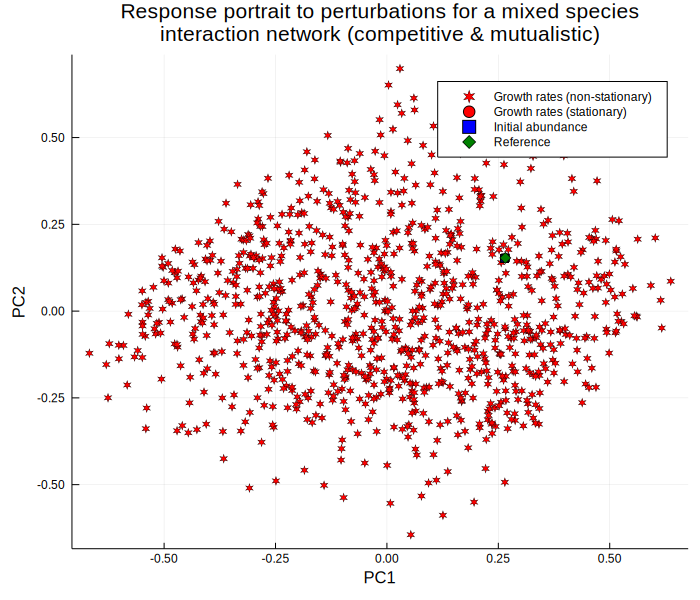

In [813]:
# train a PCA model, allowing up to 2 dimensions
M = fit(PCA, etp_sol1'; maxoutdim=2)
# apply PCA model to testing set
Yte1 = transform(M, etp_sol');

scatter(Yte_nonss2[1,1:end],Yte_nonss2[2,1:end],
        marker=:star6,
        markersize=4,
        linewidth=0,label="Growth rates (non-stationary)",
        color=:red,
        size=(700,600))

scatter!(Yte_ss2[1,1:end],Yte_ss2[2,1:end],
        marker=:circle,
        markersize=5,
        linewidth=0,label="Growth rates (stationary)",
        color=:red,
        size=(700,600))

scatter!(Yte1[1,2:end],Yte1[2,2:end],
         marker=:rect,
         markersize=3,
         color=:blue,
         linewidth=0,
         label="Initial abundance")

scatter!([Yte1[1,1]],[Yte1[2,1]],
         marker=:diamond,
         markersize=5,
         color=:green,
         linewidth=0,
         label="Reference")

plot!(xlabel="PC1",ylabel="PC2", size=(700,600))
title!("Response portrait to perturbations for a mixed species\ninteraction network (competitive & mutualistic) ")

#### Observation  
The above results show the contrasting responses of an ecological networks with competitively interacting species in the face of perturbations taking different forms: 1) alterations of initial abundances (system exhibits attractor state); and 2) slight alterations to the intrinsic growth rates (system exhibits a wide variety of responses, going from robustness to drastic shifts in system dynamics).

### Let's check community assembly dynamics

In [869]:
stats_commun_assembly = CSV.read("../output/compet_mutual_commun_assembly/StatsCCAssemblyStandGralLV_Rep$repid.csv");

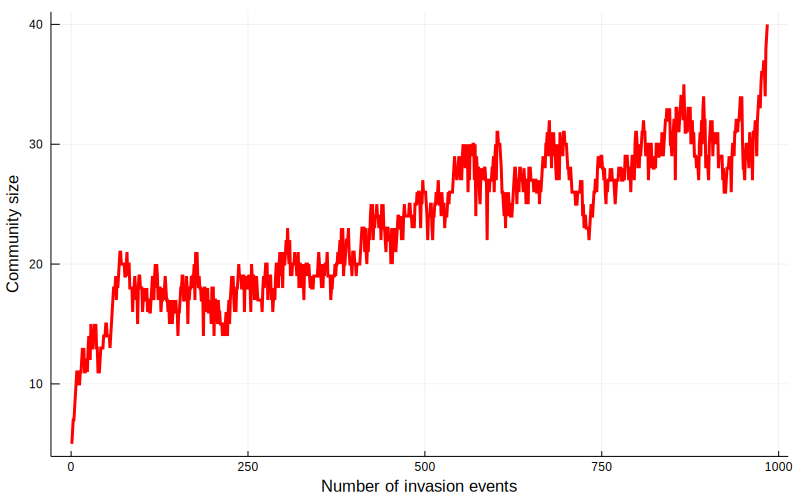

In [870]:
plot(stats_commun_assembly[!,:commun_size],color=:red,leg=false,lw=3,
     ylabel="\n Community size",
     xlabel="Number of invasion events", size=(800,500))

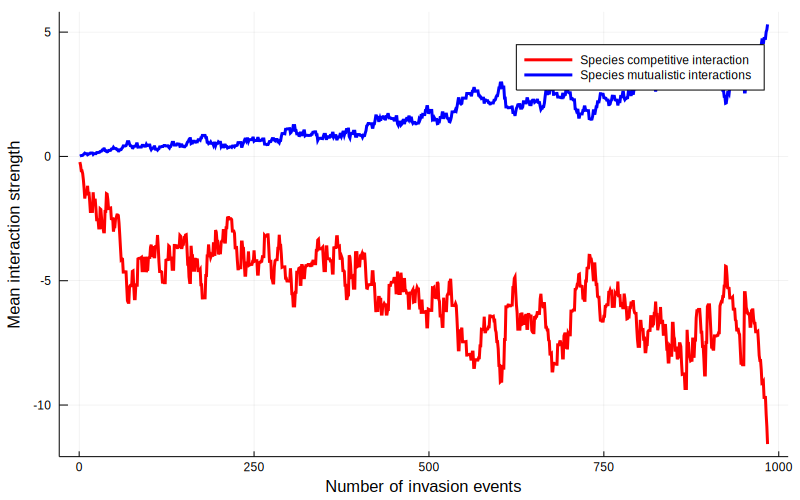

In [871]:
plot(stats_commun_assembly[!,:mean_intsps_comp_str],color=:red,leg=true,label="Species competitive interaction",lw=3,
     ylabel="\n Mean interaction strength",
     xlabel="Number of invasion events", size=(800,500))

plot!(stats_commun_assembly[!,:mean_intsps_mutual_str],color=:blue,leg=true,label="Species mutualistic interactions",lw=3,
     ylabel="\n Mean interaction strength",
     xlabel="Number of invasion events", size=(800,500))

Running a test for community assembly of a network that includes both competitively and mutualistic interacting species pairs

In [ ]:
# init_size,target_size = (4, 50)
# sample_range_A = (-1.,-1e-2)
# edge_connect_probab = 1.0 #rand(Uniform(0.5,1))
# set_intrasps_effects=-1
# prob_scale=0.25
# perturb_intrinsic_grs=false
# iter_limit=100
# A_symmetric = true
# dyn_var_thr = 1e-4
# repl = 0

# dt = @elapsed begin
#     CPUdt = @CPUelapsed runAdaptRadiationCommunAssembly2(init_size,target_size, 
#                                                         sample_range_A = sample_range_A,
#                                                         edge_connect_probab = edge_connect_probab,
#                                                         prob_scale=prob_scale,
#                                                         set_intrasps_effects=set_intrasps_effects,
#                                                         perturb_intrinsic_grs=perturb_intrinsic_grs,
#                                                         iter_limit=iter_limit, 
#                                                         A_symmetric=A_symmetric,
#                                                         add_mutual_inters = true,
#                                                         dyn_var_thr=dyn_var_thr,
#                                                         repl=repl);
# end

### Conclusions  

Our preliminary results clearly show that we will require the upscaling of our simulations to a high performance computing system so that we can address the set of questions formulated at the beginning.  

The methodology applied can be extended in many directions to address fundamental questions revolving around community assembly rules, ecological network organization and emergent properties.

#### References
1. [Network spandrels reflect ecological assembly](https://onlinelibrary.wiley.com/doi/abs/10.1111/ele.12912)
2. [Biodiversity in model ecosystems, II: species assembly and food web structure](https://www.sciencedirect.com/science/article/abs/pii/S0022519305000664?via%3Dihub)
3. [Patterns of species interaction strength in assembled theoretical competition communities
](https://onlinelibrary.wiley.com/doi/abs/10.1046/j.1461-0248.1999.22058.x)
4. [The balance of interaction types determines the assembly and stability of ecological communities](https://www.nature.com/articles/s41559-020-1121-x#:~:text=We%20demonstrate%20that%20the%20balance,tend%20to%20provide%20unique%20benefits.)
5. [Mutation Rules and the Evolution of Sparseness and Modularity in Biological Systems](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0070444)
6. [Feasibility and coexistence of large ecological communities](https://www.nature.com/articles/ncomms14389)
7. [A Derivation of Holling’s Type I, II and III Functional Responses in Predator–prey Systems.](https://www.sciencedirect.com/science/article/abs/pii/S002251931300091X)
8. [Ecological and Evolutionary Perspectives on Community Assembly](https://linkinghub.elsevier.com/retrieve/pii/S0169534715000488)
9. [Biodiversity enhances ecosystem reliability](https://www.nature.com/articles/37348)
10. [Diversity and Stability of Ecological Communities: A Comment on the Role of Empiricism in Ecology](https://www.journals.uchicago.edu/doi/10.1086/283181)
11. [Biodiversity in model ecosystems, I: coexistence conditions for competing species](https://www.sciencedirect.com/science/article/abs/pii/S0022519305000652?via%3Dihub)
12. [Universal resilience patterns in complex networks](https://www.nature.com/articles/nature16948))
13. [The structure of ecological state transitions: Amplification, synchronization, and constraints in responses to environmental change](https://www.sciencedirect.com/science/article/abs/pii/S1476945X11000614)
14. [Analysing ecological networks of species interactions](https://onlinelibrary.wiley.com/doi/10.1111/brv.12433)
15. [**Simulated evolution assembles more realistic food webs with more functionally similar species than invasion**](https://www.nature.com/articles/s41598-019-54443-0)
16. [Coexistence of many species in random ecosystems](https://www.nature.com/articles/s41559-018-0603-6)
17. [An Approach to Study Species Persistence in Unconstrained Random Networks](https://www.nature.com/articles/s41598-019-50373-z)
18. [The architecture of mutualistic networks minimizes competition and increases biodiversity](https://www.nature.com/articles/nature07950)
19. [Diversity of Interaction Types and Ecological Community Stability](https://science.sciencemag.org/content/337/6092/349)
20. [Diversity, Stability, and Reproducibility in Stochastically Assembled Microbial Ecosystems](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.120.158102)